## 题目：寻找关键用户和分析社交关系

### data.json 数据描述
#### 1. 用户节点数据包含用户ID和他们的"影响力分数"，格式为["用户名称", 影响力分数]。
#### 2. 边关系数据包含每两个用户之间的连接强度（即边的权重），格式为["用户名称1", "用户名称2", 关系权重]。
例如：
- 节点：["Yanyan-Wang", 50.95], ["Aarebecca", 23.82], ...
- 边：["Yanyan-Wang", "Aarebecca", 25.3], ["Yanyan-Wang", "pomelo-nwu", 25.09], ...


1. 社交网络构建与分析
a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。

In [1]:
import json

def load_data_from_file(file_name):
    with open(file_name, 'r') as file:
        data = json.load(file)
    return data
file_name = 'hw4_data.json'
data = load_data_from_file(file_name)

# 读取节点和边信息
nodes = data["nodes"]
edges = data["edges"]

# Step 1: 构建社交关系网络
network = {}
for node in nodes:
    user_name, _ = node
    network[user_name] = {}

for edge in edges:
    user1, user2, weight = edge
    network[user1][user2] = weight
    network[user2][user1] = weight  # 无向图

# Step 2: 找出每个用户的直接朋友
direct_friends = {user: list(friends.keys()) for user, friends in network.items()}

# 输出社交网络结构和直接朋友
print("社交网络结构：", network)
print("每个用户的直接朋友：", direct_friends)


社交网络结构： {'Yanyan-Wang': {'Aarebecca': 25.3, 'pomelo-nwu': 25.09, 'yangzy0603': 11.85, 'tyn1998': 9.62, 'yvonneyx': 7.39, 'lidongze0629': 7.25, 'RackweLLizm': 4.5, 'yikenie': 4.25, 'yubo0923': 3.61, 'Maple0817': 3.11, 'wj23027': 2.34, 'frank-zsy': 2.1, 'andyhuang18': 1.14, 'bifenglin': 0.86}, 'Aarebecca': {'Yanyan-Wang': 25.3, 'pomelo-nwu': 24.84, 'yangzy0603': 11.92, 'yvonneyx': 7.73, 'lidongze0629': 6.58, 'tyn1998': 6.4, 'RackweLLizm': 4.84, 'yikenie': 4.55, 'yubo0923': 3.82, 'Maple0817': 3.27, 'frank-zsy': 0.97}, 'pomelo-nwu': {'Yanyan-Wang': 25.09, 'Aarebecca': 24.84, 'yangzy0603': 13.85, 'tyn1998': 12.48, 'lidongze0629': 8.1, 'yvonneyx': 7.63, 'RackweLLizm': 4.97, 'yikenie': 4.66, 'bifenglin': 4.11, 'frank-zsy': 3.96, 'yubo0923': 3.9, 'wj23027': 3.86, 'andyhuang18': 3.56, 'Maple0817': 3.32, 'will-ww': 3.27, 'zhicheng-ning': 2.52, 'PureNatural': 2.36, 'xiaoya-yaya': 2.24, 'xgdyp': 2.1, 'longyanz': 2.1, 'Zzzzzhuzhiwei': 1.5, 'birdflyi': 1.33, 'lhbvvvvv': 1.09, 'zhaosj975': 1}, 'tyn19

2. 统计与度中心性分析
a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。

In [2]:
# 构建社交网络图（邻接表）
network = {}
influence_scores = {}  # 存储每个用户的影响力分数

for node in nodes:
    user_name, influence_score = node
    network[user_name] = {}
    influence_scores[user_name] = influence_score

for edge in edges:
    user1, user2, weight = edge
    network[user1][user2] = weight
    network[user2][user1] = weight  # 无向图

# a. 计算每个用户的度数（即直接朋友数量）
degree_count = {user: len(friends) for user, friends in network.items()}
# 按度数降序排序，并输出前5个用户
top_degree_users = sorted(degree_count.items(), key=lambda x: x[1], reverse=True)[:5]
print("度数最多的前5个用户及其朋友数量:")
for user, degree in top_degree_users:
    print("用户:", user, "朋友数量:", degree)

# b. 找出影响力分数最高的前5个用户
top_influence_users = sorted(influence_scores.items(), key=lambda x: x[1], reverse=True)[:5]
print("\n影响力分数最高的前5个用户:")
for user, score in top_influence_users:
    print("用户:", user, "影响力分数:", score)

# c. 综合考虑影响力分数和朋友数量，计算综合得分
# 假设影响力得分和朋友数量按50%:50%比例加权
combined_score = {}
for user in network:
    # 将影响力和朋友数量标准化后加权求和
    influence_weight = influence_scores[user] * 0.5
    degree_weight = degree_count[user] * 0.5
    combined_score[user] = influence_weight + degree_weight

# 综合得分排名前5的用户
top_combined_users = sorted(combined_score.items(), key=lambda x: x[1], reverse=True)[:5]
print("\n综合考虑影响力分数和朋友数量最有影响力的前5个用户:")
for user, score in top_combined_users:
    print("用户:", user, "综合得分:", score)

度数最多的前5个用户及其朋友数量:
用户: tyn1998 朋友数量: 30
用户: frank-zsy 朋友数量: 30
用户: pomelo-nwu 朋友数量: 24
用户: andyhuang18 朋友数量: 23
用户: wj23027 朋友数量: 23

影响力分数最高的前5个用户:
用户: Yanyan-Wang 影响力分数: 50.95
用户: Aarebecca 影响力分数: 23.82
用户: pomelo-nwu 影响力分数: 22.36
用户: tyn1998 影响力分数: 16.64
用户: frank-zsy 影响力分数: 15.8

综合考虑影响力分数和朋友数量最有影响力的前5个用户:
用户: Yanyan-Wang 综合得分: 32.475
用户: tyn1998 综合得分: 23.32
用户: pomelo-nwu 综合得分: 23.18
用户: frank-zsy 综合得分: 22.9
用户: Aarebecca 综合得分: 17.41


3. 推荐新朋友
a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。
b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。

In [3]:
# 构建社交网络图（邻接表）
network = {}
for node in nodes:
    user_name, _ = node
    network[user_name] = {}

for edge in edges:
    user1, user2, weight = edge
    network[user1][user2] = weight
    network[user2][user1] = weight  # 无向图

# a. 找出 Yanyan-Wang 的“朋友的朋友”中最有可能成为新朋友的用户
target_user = "Yanyan-Wang"
direct_friends = set(network[target_user].keys())

# 统计每个“朋友的朋友”被直接朋友提及的次数
potential_friends = {}
for friend in direct_friends:
    for fof in network[friend]:
        # 排除掉 Yanyan-Wang 自己和她的直接朋友
        if fof != target_user and fof not in direct_friends:
            if fof not in potential_friends:
                potential_friends[fof] = 0
            potential_friends[fof] += 1

# 按共同朋友数量降序排序
sorted_potential_friends = sorted(potential_friends.items(), key=lambda x: x[1], reverse=True)
print("推荐的新朋友及推荐理由（共同朋友数量）：")
for fof, common_friends_count in sorted_potential_friends:
    print("用户:", fof, "共同朋友数量:", common_friends_count)

# b. 找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友）
connection_strength = {}
for edge in edges:
    user1, user2, weight = edge
    if user1 == target_user or user2 == target_user:
        other_user = user2 if user1 == target_user else user1
        connection_strength[other_user] = weight

# 按连接强度降序排序，取前5个
sorted_strength_friends = sorted(connection_strength.items(), key=lambda x: x[1], reverse=True)[:5]
print("\n与 Yanyan-Wang 连接强度最高的5个用户（推荐排序）：")
for user, strength in sorted_strength_friends:
    print("用户:", user, "连接强度:", strength)

推荐的新朋友及推荐理由（共同朋友数量）：
用户: will-ww 共同朋友数量: 6
用户: Zzzzzhuzhiwei 共同朋友数量: 6
用户: lhbvvvvv 共同朋友数量: 6
用户: zhicheng-ning 共同朋友数量: 6
用户: PureNatural 共同朋友数量: 6
用户: xgdyp 共同朋友数量: 6
用户: birdflyi 共同朋友数量: 6
用户: xiaoya-yaya 共同朋友数量: 6
用户: longyanz 共同朋友数量: 6
用户: zhaosj975 共同朋友数量: 6
用户: stevending1st 共同朋友数量: 5
用户: wxharry 共同朋友数量: 4
用户: pranavshuklaa 共同朋友数量: 4
用户: stealth-bombeer 共同朋友数量: 4
用户: Vlad116 共同朋友数量: 4
用户: kunal8411 共同朋友数量: 4

与 Yanyan-Wang 连接强度最高的5个用户（推荐排序）：
用户: Aarebecca 连接强度: 25.3
用户: pomelo-nwu 连接强度: 25.09
用户: yangzy0603 连接强度: 11.85
用户: tyn1998 连接强度: 9.62
用户: yvonneyx 连接强度: 7.39


4. 网络图的可视化
a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

In [ ]:
import json
import networkx as nx
import matplotlib.pyplot as plt
# 读取节点和边信息
nodes = data["nodes"]
edges = data["edges"]

# 构建 NetworkX 图
G = nx.Graph()
influence_scores = {}

# 添加节点
for node in nodes:
    user_name, influence_score = node
    influence_scores[user_name] = influence_score
    G.add_node(user_name, influence=influence_score)

# 添加边
for edge in edges:
    user1, user2, weight = edge
    G.add_edge(user1, user2, weight=weight)

# 计算每个用户的度数（直接朋友数量），用于设置节点大小
degree_dict = dict(G.degree())
node_sizes = [degree_dict[user] * 50 for user in G.nodes()]  # 适当放大节点大小

# 设置节点颜色，基于影响力得分（归一化后用颜色表示）
influence_values = [influence_scores[user] for user in G.nodes()]
norm = plt.Normalize(vmin=min(influence_values), vmax=max(influence_values))
node_colors = plt.cm.viridis(norm(influence_values))  # 使用映射颜色

# 绘制图
plt.figure(figsize=(12, 12))
nx.draw_networkx(
    G,
    node_size=node_sizes,
    node_color=node_colors,
    with_labels=True,
    edge_color="gray",
    font_size=8
)
# 添加 colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
plt.colorbar(sm, label="影响力得分")

plt.title("用户关系网络图")

plt.savefig("network_graph.png", format="png") 
plt.show()

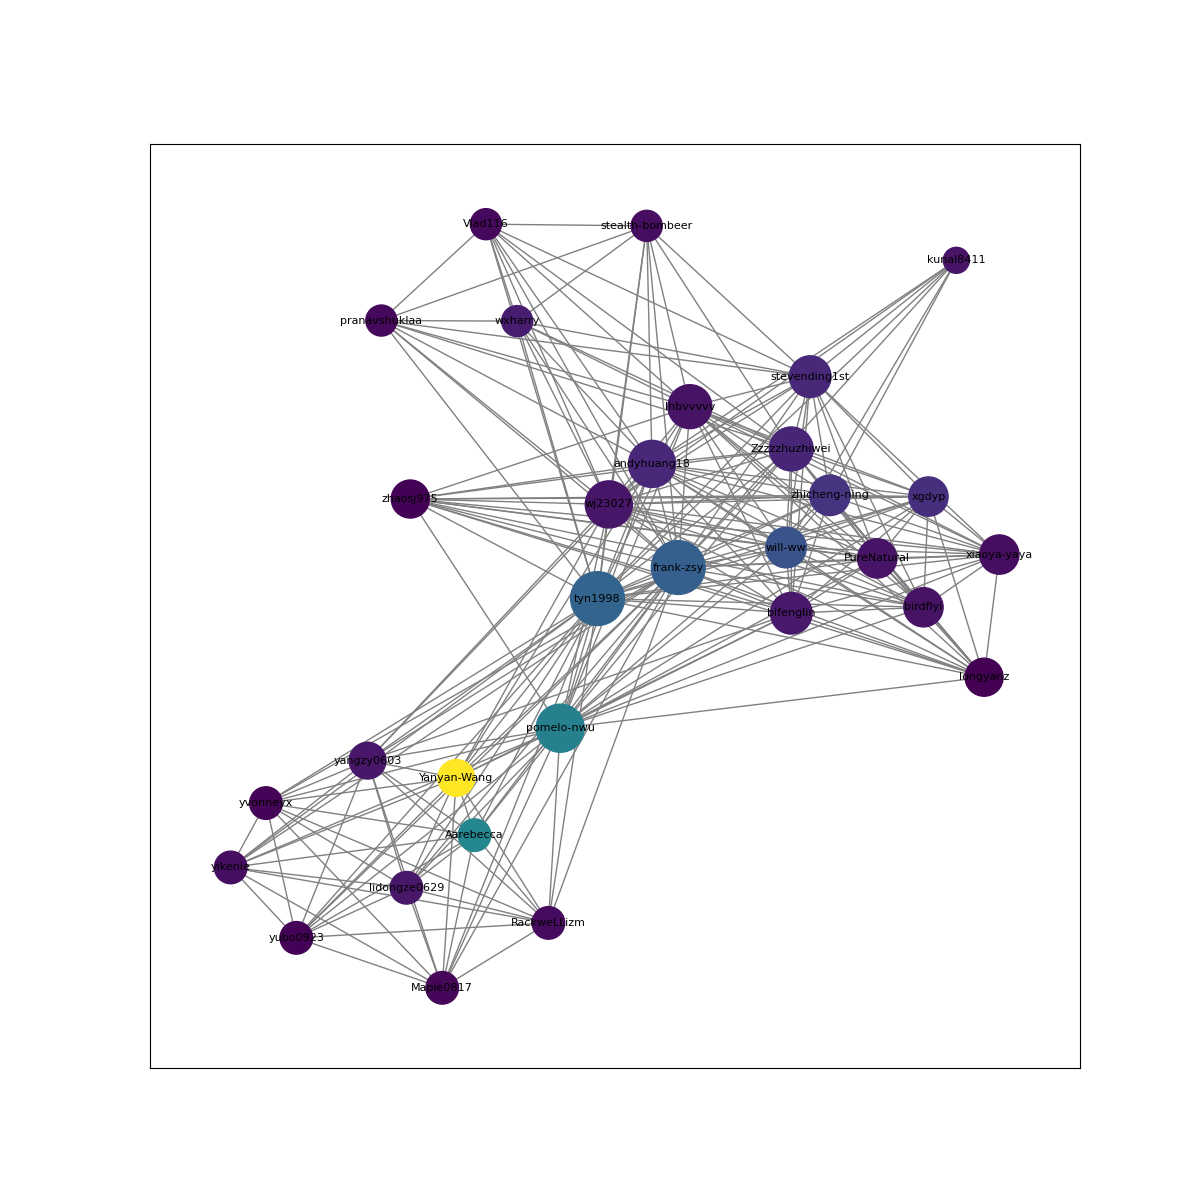

In [4]:
from IPython.display import Image; Image(filename='network_graph.png')